In [4]:
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd

# Parameters
duration = 1.0
sample_rate = 44100

def generate_single_frequency_signal(freq, duration, sample_rate):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    signal = np.sin(2 * np.pi * freq * t)
    return signal, t

def play_audio(signal, sample_rate):
    audio = ipd.Audio(signal, rate=sample_rate)
    ipd.display(audio)

def plot_signal(signal, sample_rate, title):
    duration = len(signal) / sample_rate
    t = np.linspace(0, duration, len(signal), endpoint=False)
    plt.figure(figsize=(10, 4))
    plt.plot(t, signal)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.title(title)
    plt.grid(True)
    plt.show()


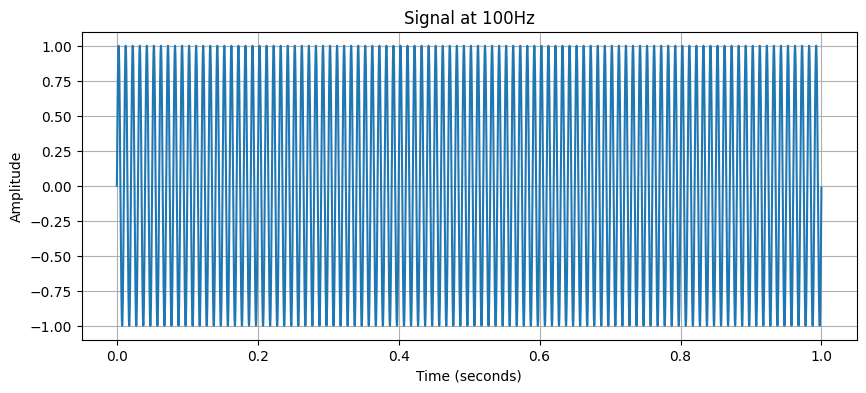

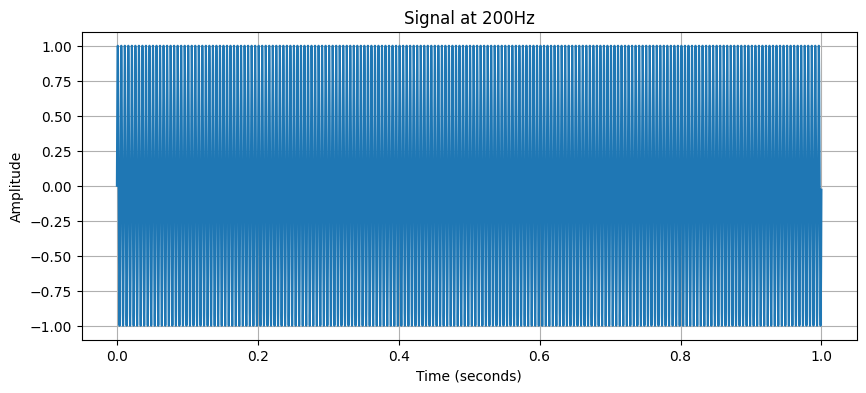

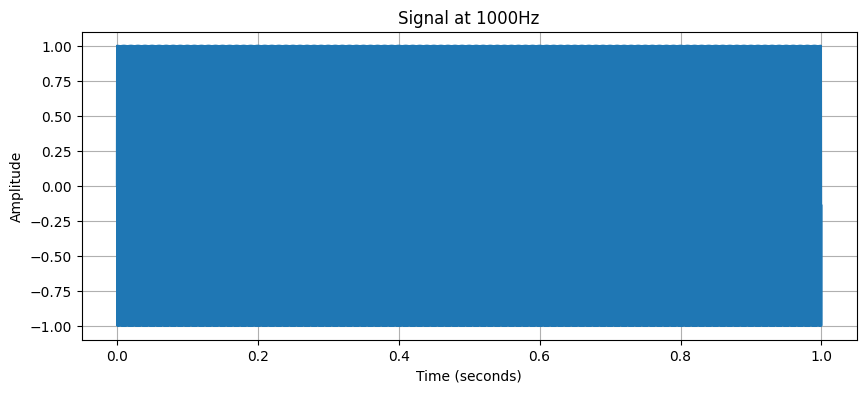

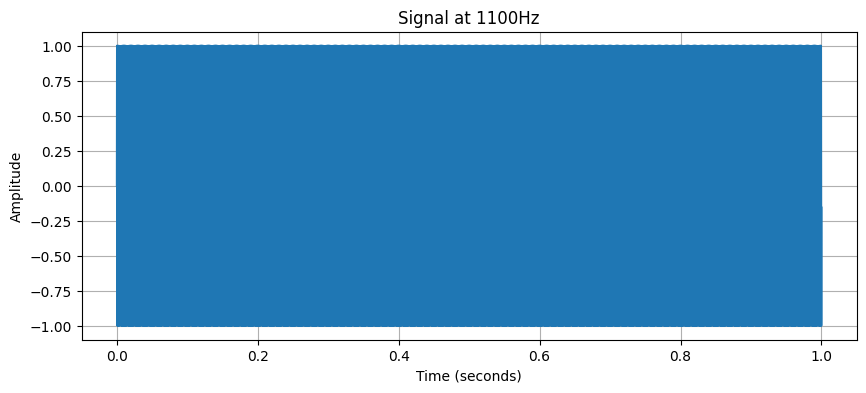

In [9]:
# Frequencies
frequencies = [100, 200, 1000, 1100]

# Generate and plot signals
audio_100, _ = generate_single_frequency_signal(frequencies[0], duration, sample_rate)
audio_200, _ = generate_single_frequency_signal(frequencies[1], duration, sample_rate)
audio_1000, _ = generate_single_frequency_signal(frequencies[2], duration, sample_rate)
audio_1100, _ = generate_single_frequency_signal(frequencies[3], duration, sample_rate)

# Plot the signals
plot_signal(audio_100, sample_rate, 'Signal at 100Hz')
plot_signal(audio_200, sample_rate, 'Signal at 200Hz')
plot_signal(audio_1000, sample_rate, 'Signal at 1000Hz')
plot_signal(audio_1100, sample_rate, 'Signal at 1100Hz')

# Play audios

play_audio(audio_100, sample_rate)
play_audio(audio_200, sample_rate)
play_audio(audio_1000, sample_rate)
play_audio(audio_1100, sample_rate)

É notável a diferença entre as frequências, e sempre bom lembrar que dobrando a frequência, subimos uma oitava na escala musical

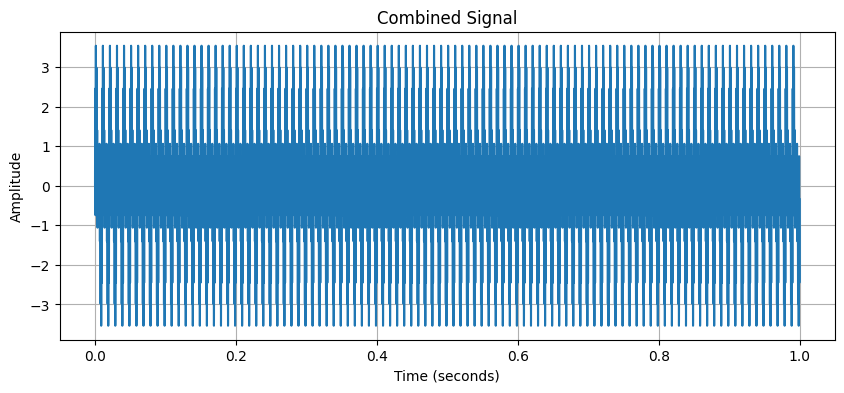

In [10]:
def generate_multi_frequency_signal(freqs, duration, sample_rate):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    signal = np.sum([np.sin(2 * np.pi * freq * t) for freq in freqs], axis=0)
    return signal, t

combined_signal, t = generate_multi_frequency_signal(frequencies, duration, sample_rate)
# Plot the combined signal
plot_signal(combined_signal, sample_rate, 'Combined Signal')


play_audio(combined_signal, sample_rate)

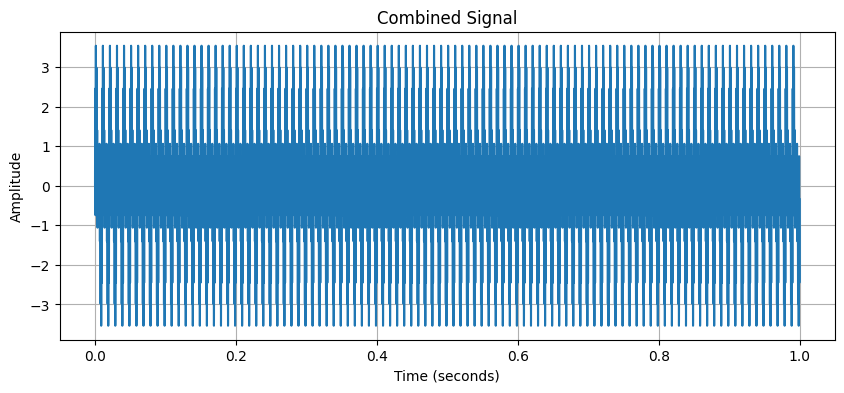

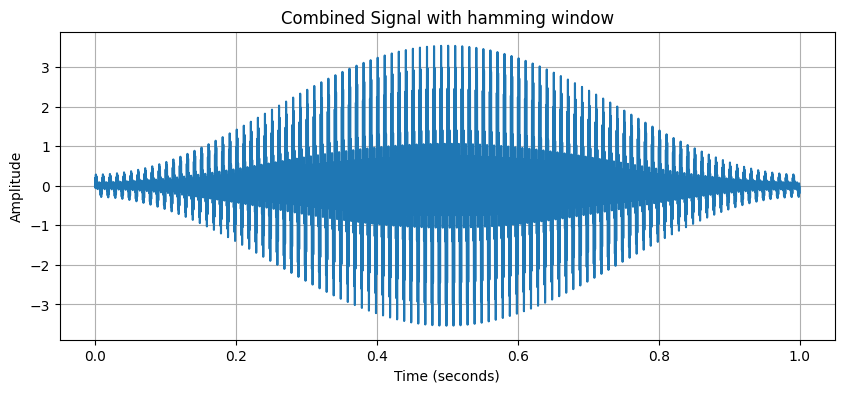

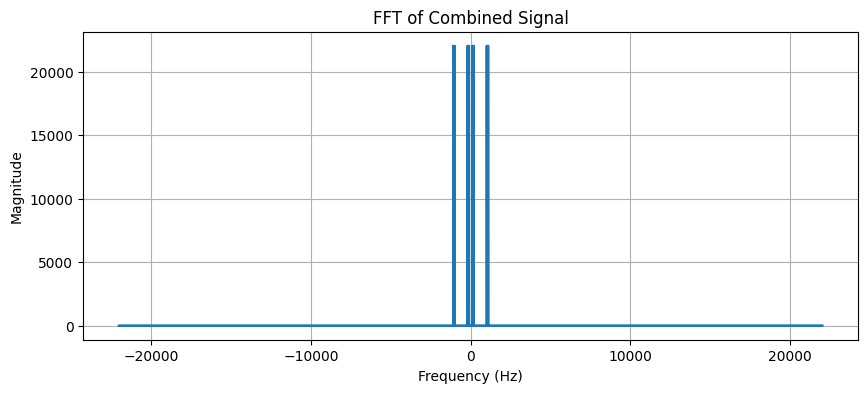

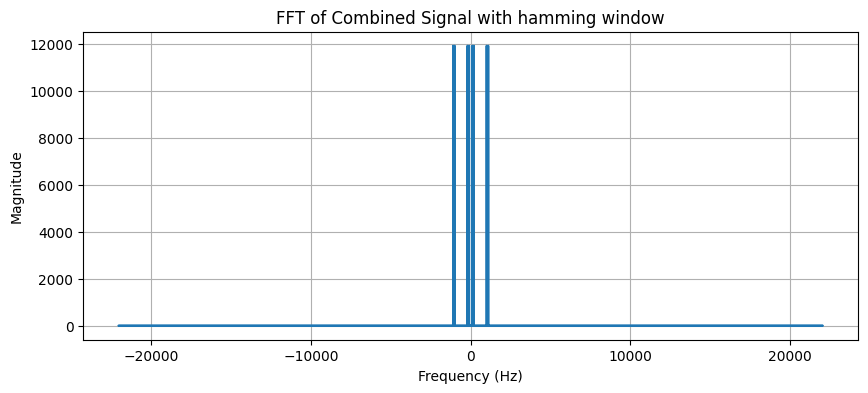

In [11]:
def apply_window(signal, window_type):
    windows = {
        'bartlett': np.bartlett,
        'blackman': np.blackman,
        'hamming': np.hamming,
        'hanning': np.hanning,
        # Add more window types here as needed
    }

    if window_type in windows:
        window_func = windows[window_type]
        window = window_func(len(signal))
        return signal * window
def plot_fft(signal, sample_rate, title):
    fft_values = np.fft.fft(signal)
    magnitude = np.abs(fft_values)
    frequency_bins = np.fft.fftfreq(len(signal), 1/sample_rate)
    plt.figure(figsize=(10, 4))
    plt.plot(frequency_bins, magnitude)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.title(title)
    plt.grid(True)
    plt.show()


window_type = 'hamming'
windowed_combined_signal = apply_window(combined_signal, window_type)

# Plot the combined signal before and after windowing
plot_signal(combined_signal, sample_rate, 'Combined Signal')
plot_signal(windowed_combined_signal, sample_rate, f'Combined Signal with {window_type} window')

# Plot the FFT of the combined signal before and after windowing
plot_fft(combined_signal, sample_rate, 'FFT of Combined Signal')
plot_fft(windowed_combined_signal, sample_rate, f'FFT of Combined Signal with {window_type} window')

O janelamento foi aplicado e é possível visualizar pelo formato da onda, onde nos cantos há uma normalização para zero
Já transformando para frequências, o janelamento não causou diferença, por ser constituido de senos perfeitos

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import math
import librosa

bass, sr_bass = librosa.load('1Bass.wav',sr=None)
Electric_Guitar, sr_string = librosa.load('1Electric_Guitar.wav',sr=None)
Glockenspiel , sr_violin = librosa.load('1Glockenspiel.wav',sr=None)

def freqToMel(f):
  return 1127 * math.log(1+(f/700))

def plot_mel_spectrogram(sinal, sample_rate, title):
  plt.figure(figsize=(10,4))
  mel_spectrogram = librosa.feature.melspectrogram(y=sinal, sr=sample_rate)
  mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
  y_axis_values = librosa.mel_frequencies()
  librosa.display.specshow(mel_spectrogram_db, sr=sample_rate, x_axis='time', y_axis='mel', y_coords=y_axis_values)
  plt.colorbar(format='%2.0f dB')
  plt.title(title)
  plt.tight_layout()
  plt.show()

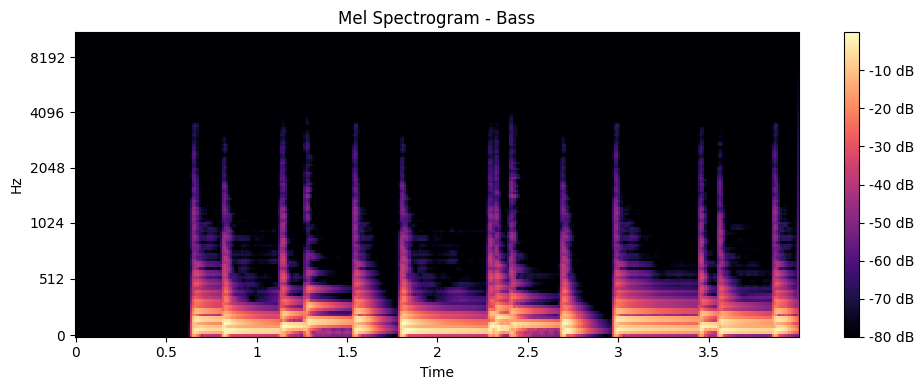

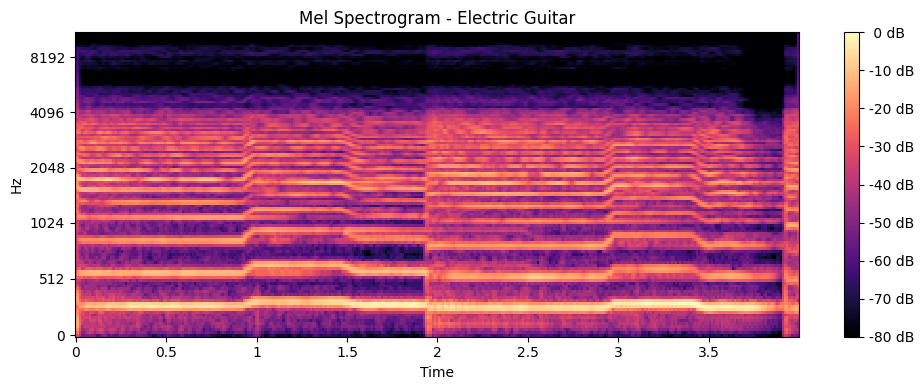

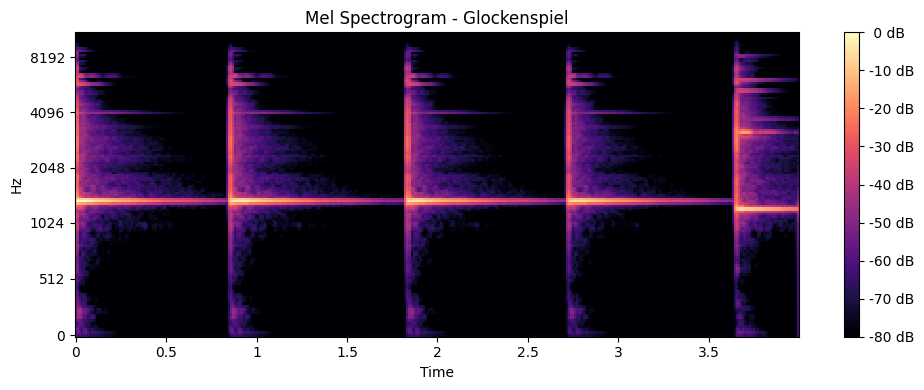

In [13]:
# Plot the Mel spectrogram of each audio
plot_mel_spectrogram(bass, sr_bass, 'Mel Spectrogram - Bass')
plot_mel_spectrogram(Electric_Guitar, sr_string, 'Mel Spectrogram - Electric Guitar')
plot_mel_spectrogram(Glockenspiel, sr_violin, 'Mel Spectrogram - Glockenspiel')

In [17]:
def plot_mfcc(sinal, sample_rate,n_mfcc, title):
  plt.figure(figsize=(10,4))
  mfccs = librosa.feature.mfcc(y=sinal,sr=sample_rate,n_mfcc=n_mfcc)
  librosa.display.specshow(mfccs, x_axis='time', sr=sample_rate)
  plt.colorbar()
  plt.title(title)
  plt.tight_layout()
  plt.show()


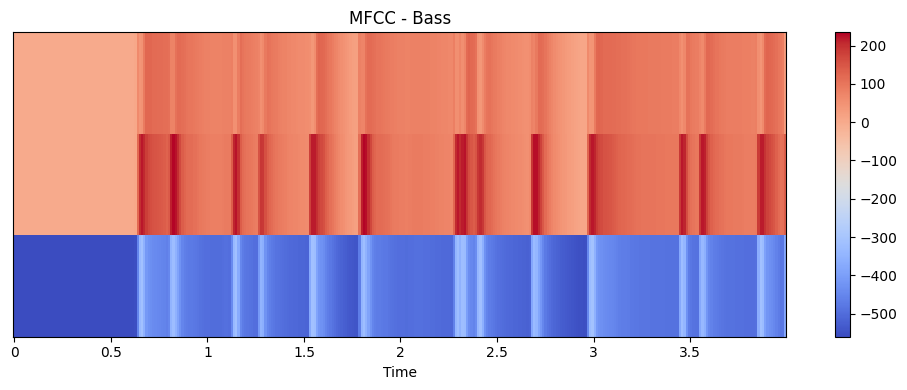

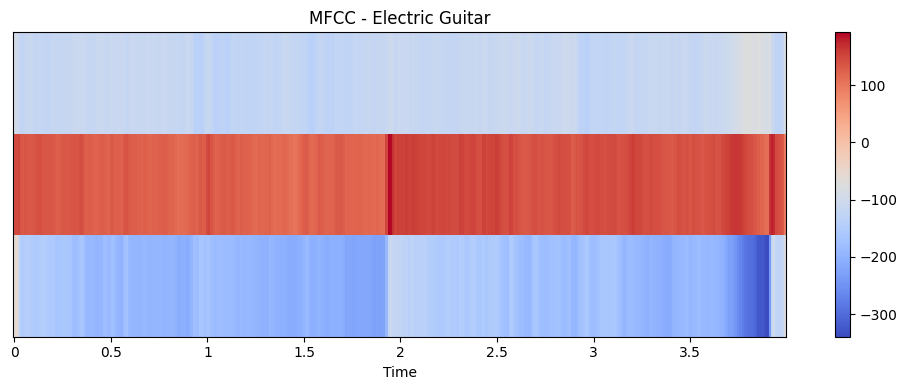

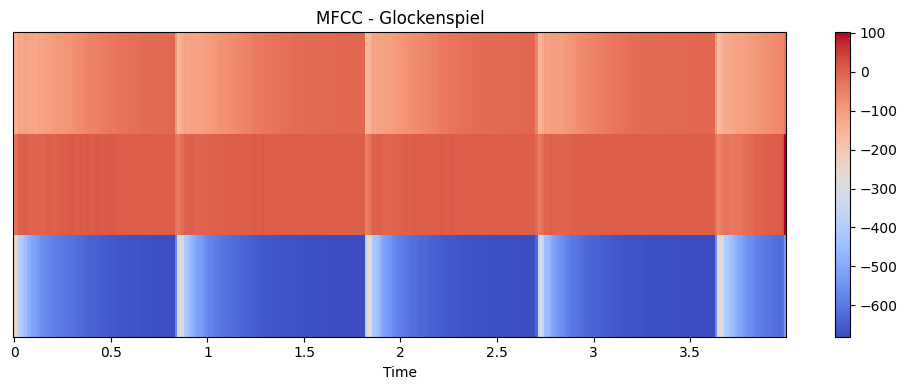

In [18]:
# Plot the MFCC of each audio
plot_mfcc(bass, sr_bass, 3, 'MFCC - Bass')
plot_mfcc(Electric_Guitar, sr_string, 3, 'MFCC - Electric Guitar')
plot_mfcc(Glockenspiel, sr_violin, 3, 'MFCC - Glockenspiel')